**Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import random
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
tf.random.set_seed(42)
from nlp_model_text_preprocessing import index_the_words, text_to_sequence, pad_sequences, one_hot_encoding, index_the_char, text_to_sequence_char, char_sequence_to_text, word_sequence_to_text
from arabic_text_normalization import text_normalization
from deep_learning import nlp_model_word, nlp_model_char, model_compile_word, model_compile_char, model_fit, plot_word_model_change, plot_char_model_change
from model_testing import model_testing_char, model_testing_word
from transformers_models import load_dataset, data_collator, train_arguments, training_, save_model_tokenizer, transformer_testing,transformes_model
from read_data import read_file
from generate_train_label import generate_train_label_word, generate_train_label_char
from model_check_point import check_point
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

**Ignore Warnings**

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

**Read Data**

In [ ]:
Corpus = read_file(file_path='الخيميائي.txt', text_normalization=text_normalization)
len(Corpus)

1242

In [ ]:
with open('Cleaned_Corpus.txt', 'w') as f:
    for line in Corpus:
        f.write(line + '\n')

**Generate Early Stop Depending On Value Of Loss**

In [ ]:
early_stop_ = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    mode = 'min',
    restore_best_weights=True,
)

**1-Tokens Based On Word**

In [ ]:
# Generate Word To Index, Index To Word, And Find Count Of All Words
all_words, words_index, index_to_words = index_the_words(Corpus)
all_words

8911

In [ ]:
max_length_word, train, labels = generate_train_label_word(Corpus, text_to_sequence, words_index, pad_sequences)
max_length_word

163

In [ ]:
# Convert Label Data
label = one_hot_encoding(labels, all_words)
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Deep Learning Models*

Epoch 1/150
872/872 [==============================] - 38s 42ms/step - loss: 8.2396 - accuracy: 0.0246
Epoch 2/150
872/872 [==============================] - 33s 37ms/step - loss: 7.6907 - accuracy: 0.0291
Epoch 3/150
872/872 [==============================] - 33s 38ms/step - loss: 7.3804 - accuracy: 0.0352
Epoch 4/150
872/872 [==============================] - 34s 39ms/step - loss: 6.9909 - accuracy: 0.0457
Epoch 5/150
872/872 [==============================] - 34s 39ms/step - loss: 6.4952 - accuracy: 0.0592
Epoch 6/150
872/872 [==============================] - 34s 39ms/step - loss: 5.9435 - accuracy: 0.0804
Epoch 7/150
872/872 [==============================] - 34s 39ms/step - loss: 5.3803 - accuracy: 0.1145
Epoch 8/150
872/872 [==============================] - 34s 39ms/step - loss: 4.8346 - accuracy: 0.1759
Epoch 9/150
872/872 [==============================] - 34s 39ms/step - loss: 4.3009 - accuracy: 0.2557
Epoch 10/150
872/872 [==============================] - 34s 39ms/step - l

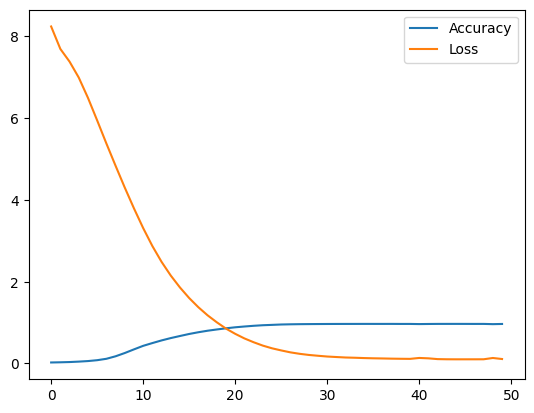

In [ ]:
# 1-LSTM
arabic_lstm_check_point_1 = check_point('Arabic_Lstm_1')
lstm_model = tf.keras.layers.LSTM(units=128, return_sequences=False)
LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = lstm_model)
model_compile_word(model =LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=arabic_lstm_check_point_1 ,batch_size=32)
plot_word_model_change(history=history)

Epoch 1/150
436/436 [==============================] - 50s 107ms/step - loss: 8.2286 - accuracy: 0.0249
Epoch 2/150
436/436 [==============================] - 44s 102ms/step - loss: 7.6660 - accuracy: 0.0294
Epoch 3/150
436/436 [==============================] - 44s 101ms/step - loss: 7.3371 - accuracy: 0.0368
Epoch 4/150
436/436 [==============================] - 44s 100ms/step - loss: 6.9100 - accuracy: 0.0446
Epoch 5/150
436/436 [==============================] - 44s 100ms/step - loss: 6.4213 - accuracy: 0.0573
Epoch 6/150
436/436 [==============================] - 43s 100ms/step - loss: 5.9302 - accuracy: 0.0722
Epoch 7/150
436/436 [==============================] - 44s 101ms/step - loss: 5.4553 - accuracy: 0.0969
Epoch 8/150
436/436 [==============================] - 45s 102ms/step - loss: 5.0086 - accuracy: 0.1357
Epoch 9/150
436/436 [==============================] - 44s 101ms/step - loss: 4.5785 - accuracy: 0.1968
Epoch 10/150
436/436 [==============================] - 44s 100m

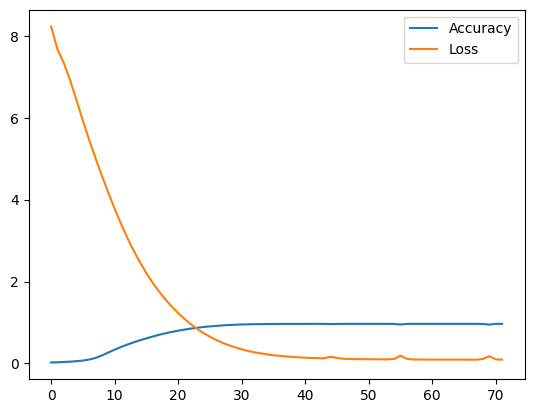

In [ ]:
# 2-Bidirectional LSTM
arabic_bidirectional_lstm_check_point_1 = check_point('Arabic_Bidirectional_1')
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = bidirectional_lstm_model)
model_compile_word(model =Bidirectional_LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=Bidirectional_LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=arabic_bidirectional_lstm_check_point_1, batch_size=64)
plot_word_model_change(history=history)

Epoch 1/150
872/872 [==============================] - 55s 59ms/step - loss: 8.2510 - accuracy: 0.0255
Epoch 2/150
872/872 [==============================] - 41s 47ms/step - loss: 7.5294 - accuracy: 0.0357
Epoch 3/150
872/872 [==============================] - 41s 48ms/step - loss: 6.9418 - accuracy: 0.0542
Epoch 4/150
872/872 [==============================] - 41s 47ms/step - loss: 6.2263 - accuracy: 0.0789
Epoch 5/150
872/872 [==============================] - 40s 46ms/step - loss: 5.4421 - accuracy: 0.1168
Epoch 6/150
872/872 [==============================] - 40s 46ms/step - loss: 4.6713 - accuracy: 0.1905
Epoch 7/150
872/872 [==============================] - 40s 46ms/step - loss: 3.9481 - accuracy: 0.3032
Epoch 8/150
872/872 [==============================] - 40s 45ms/step - loss: 3.2928 - accuracy: 0.4186
Epoch 9/150
872/872 [==============================] - 40s 45ms/step - loss: 2.7114 - accuracy: 0.5204
Epoch 10/150
872/872 [==============================] - 40s 45ms/step - l

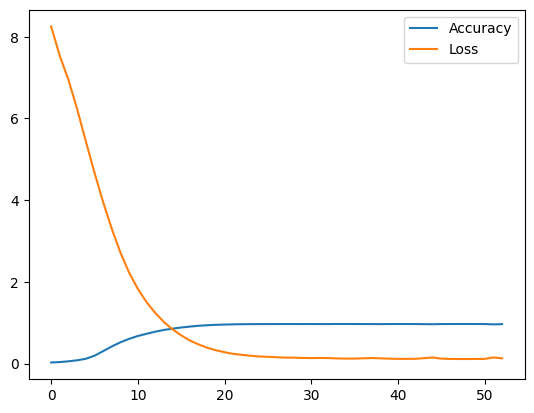

In [ ]:
# 3-GRU
arabic_gru_check_point_1 = check_point('Arabic_GRU1')
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = gru_model)
model_compile_word(model =GRU_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=GRU_1, Data=train, Label=label, epochs=150, early_stop=early_stop_, checkpoint=arabic_gru_check_point_1 , batch_size=32)
plot_word_model_change(history=history)

*Testing The Model*

In [ ]:
# 1-LSTM
model_testing_word(text = 'تناول الخيميائي ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='Arabic_Lstm_1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'تناول الخيميائي بيده كتاباً كان قد أحضره أحد أفراد القافلة لم يكن للكتاب غلاف ولكنه استطاع على الرغم من ذلك التعرف على اسم الكاتب أوسكار وايلد وهو يقلب صفحاته وقع نظره على قصة كانت تتحدث عن نرجس لاشك أن الخيميائي يعرف أسطورة نرجس هذا الشاب الوسيم الذي يذهب كل يوم ليتأمل بهاءه'

In [ ]:
# 2-Bidirectional LSTM
model_testing_word(text = 'رأى تاجر الزجاجيّات شروق ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='Arabic_Bidirectional_1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه منذ مايقارب الثلاثين عاماً وكان متجره يقع في قمّة طريق منحدرة ومن النادر مرور زبون واحد من هناك وقد فات الأوان على التاجر كي يغيّر مهنته فكل ماكان قد تعلّمه عبر حياته كلّها هو بيع وشراء'

In [ ]:
# 3-GRU
model_testing_word(text = 'إن مافهمه في تلك اللحظة ', number_of_words = 50, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, checkpoint_filepath='Arabic_GRU1_model_checkpoint.h5', max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

'إن مافهمه في تلك اللحظة هو انه أمام امرأة حياته وعليها أن تعلم ذلك دونما أية ضرورة للكلام كان متأكداً من هذا أكثر من تأكده من أي شيء آخر في العالم على الرغم من أن آبائه وآباء آبائه كانوا قد قالوا إن على الانسان أن يحب أولاً ثم يخطب أن يعرف الآخر وأن يملك المال'

**2-Token Based On Character**

In [ ]:
# Generate Char To Index, Index To Char, And Find Count Of All Char
all_chars, chars_index, index_chars = index_the_char(Corpus)
all_chars

45

In [ ]:
chars_index

{' ': 0,
 'ء': 1,
 'آ': 2,
 'أ': 3,
 'ؤ': 4,
 'إ': 5,
 'ئ': 6,
 'ا': 7,
 'ب': 8,
 'ة': 9,
 'ت': 10,
 'ث': 11,
 'ج': 12,
 'ح': 13,
 'خ': 14,
 'د': 15,
 'ذ': 16,
 'ر': 17,
 'ز': 18,
 'س': 19,
 'ش': 20,
 'ص': 21,
 'ض': 22,
 'ط': 23,
 'ظ': 24,
 'ع': 25,
 'غ': 26,
 'ف': 27,
 'ق': 28,
 'ك': 29,
 'ل': 30,
 'م': 31,
 'ن': 32,
 'ه': 33,
 'و': 34,
 'ى': 35,
 'ي': 36,
 'ً': 37,
 'ٌ': 38,
 'ٍ': 39,
 'َ': 40,
 'ُ': 41,
 'ِ': 42,
 'ّ': 43,
 'ْ': 44,
 'UNK': 45}

In [ ]:
# Find The Max Length
max_length_char = max([len(s) for s in Corpus])
max_length_char

866

In [ ]:
# Generate Train And Label Data
Train, Label = generate_train_label_char(Corpus, max_length_char, 3)


In [ ]:
# Convert Words Into Number
sequence_text_char_Train = text_to_sequence_char(chars_index, Train)
sequence_text_char_Label = text_to_sequence_char(chars_index, Label)

In [ ]:
# Padding The The Input Sequence To Make All Sequence In Same Length
Train = pad_sequences(input_sequence=sequence_text_char_Train, max_length=max_length_char, padding='post')
# # Convert The Label Data
Label = one_hot_encoding(sequence_text_char_Label, all_chars)

**Deep Learning Model**

In [ ]:
# 1-LSTM
arabic_lstm_check_point_2 = check_point('Arabic_LSTM_2')
lstm_model = tf.keras.layers.LSTM(units= 128, return_sequences=False)
LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = lstm_model, input_length=max_length_char)
model_compile_char(model =LSTM_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop_, checkpoint= arabic_lstm_check_point_2, batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 2-Bidirectional_LSTM
arabic_bidirectional_lstm_check_point_2 = check_point('Arabic_Bidirectional_2')
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = bidirectional_lstm_model, input_length=max_length_char)
model_compile_char(model =Bidirectional_LSTM_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=Bidirectional_LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop_, checkpoint= arabic_bidirectional_lstm_check_point_2, batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 3-GRU
arabic_gru_check_point_2 = check_point('Arabic_GRU2')
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = gru_model, input_length=max_length_char)
model_compile_char(model =GRU_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=GRU_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop_, batch_size=32)
plot_char_model_change(history=history)

**Model Testing**

In [ ]:
# 1-LSTM
model_testing_char(text = 'تناول ', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, checkpoint_filepath= 'Arabic_LSTM_2_model_checkpoint.h5', max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 2-Bidirectional LSTM
model_testing_char(text = 'أضاءت أشعة القمر ', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences,  checkpoint_filepath= 'Arabic_Bidirectional_2_model_checkpoint.h5', max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 3-GRU
model_testing_char(text = 'أضاءت أشعة القمر ', number_of_chars = 200, char_index = chars_index, pad_sequences = pad_sequences, checkpoint_filepath= 'Arabic_GRU2_model_checkpoint.h5', max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

**3-Transformers**

In [3]:
# Transformers Model Name
import torch
model_name_ = 'aubmindlab/aragpt2-base'
# Model And Tokenizer For Transformers
tokenizer, model = transformes_model(model_name_)
# Data Used For Train Transformers
train_dataset = load_dataset('Cleaned_Corpus.txt', tokenizer)
# Convert Data Into Batches
collator = data_collator(tokenizer)
# Set Arguments For Train The Transformers
train_args = train_arguments(epochs = 70)
# Train The Transformers
training_(model=model, training_args=train_args, collator = collator, data = train_dataset)
# Save The Model
save_model_tokenizer(model = model, tokenizer = tokenizer)
# Testing The Transformers Model
transformer_testing(input_text='سأل الشاب: ', tokenizer=tokenizer, model=model, text_normalization = text_normalization)


vocab.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

Step,Training Loss
500,5.623600
1000,3.985300
1500,3.139200
2000,2.427600
2500,1.797700
3000,1.317500
3500,0.974200
4000,0.726200
4500,0.566300
5000,0.443900


'إنني خيميائي لأنني خيميائي\nصمتت أشعة القمر وجه إلى المكان الذي كان قد سقط فيه وذلك في الصحراء ولم يكن هناك إلا ضوء القمر والصمت الدواب أيضاً والشمس\nهل بإمكانك أن توفّر عليّ أن أتوصّل إلى ذلك\nهل أنت سأل الشاب\nلأنك لا أعرف شيئاً أجاب الخيميائي\nكان ينبغي عليّ أن أتخلّم عن كل شيء لكنني أريد أن أتحوّ�'

In [5]:
transformer_testing(input_text='سأل الشاب: ', tokenizer=tokenizer, model=model, text_normalization = text_normalization)


'سأل الشاب لم تعلمُ أية أهميّة\nأجاب الخيميائي\nلكنني ذاهب للبحث عن كنزي لدي فكرة جديدة\nأجاب الشاب\nيوجد هنا الكثر من النمل في الأرض وقال\nيوجد هنا أنواع مختلفة من النمل في الأرض الغريبة ومن المُلد من النمل في الحال التي تحتوي على كنزي والنحاس ومن المسطح من اللبون\nإن منقوش هي المادة التي كانت تدعى إكسير الحياة المديد وهذا الإكسير لم أكن قد علمت أن'